<a href="https://colab.research.google.com/github/techman0256/Data_Mining_CP1/blob/main/Data_Mining_CP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('drive/MyDrive/colab_mount/Datasets/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
# df.head()

df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [5]:
print(df.shape)
print(df.isnull().sum())

(53392, 33)
YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID 

<h3 style="color=blue"> Data Cleaning </h3>


*   YearStart and YearEnd have no null values but they have same value So we can drop any of the column
*   Drop Data_Value_Alt, Data_Value_Unit
*   Drop LocationAbbr due to redunduncy
*   Drop Datasource(all same), Data_Value_Unit(all blank), Data_value_type(all same)
*   Class and Topic are same
*   Drop GeoLocation




In [ ]:
# df.iloc[:, 0:2]
# absErr = df['YearStart'] - df['YearEnd']
# absErr.sum

absErr = df['Data_Value'] - df['Data_Value_Alt']
print(absErr.sum())

# will drop 'YearEnd',

0.0


In [6]:
df = df.drop(['YearEnd', 'Data_Value_Alt', 'Data_Value_Unit', 'Data_Value_Type', 'LocationDesc', 'Datasource', 'Topic', 'TopicID', 'GeoLocation', 'DataValueTypeID', 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol'], axis=1)

In [7]:
df = df.dropna(subset=['Data_Value'])

In [8]:
print(df.columns)
df.isnull().sum()
# df.describe()

Index(['YearStart', 'LocationAbbr', 'Class', 'Question', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'ClassID', 'QuestionID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


YearStart                        0
LocationAbbr                     0
Class                            0
Question                         0
Data_Value                       0
Low_Confidence_Limit             0
High_Confidence_Limit            0
Sample_Size                      0
Total                        46439
Age(years)                   36908
Education                    40718
Gender                       44532
Income                       34997
Race/Ethnicity               38136
ClassID                          0
QuestionID                       0
LocationID                       0
StratificationCategory1          0
Stratification1                  0
StratificationCategoryId1        0
StratificationID1                0
dtype: int64

In [9]:
df.head()

,YearStart,LocationAbbr,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),...,Gender,Income,Race/Ethnicity,ClassID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,7304.0,Total,NaN,...,NaN,NaN,NaN,OWS,Q036,1,Total,Total,OVR,OVERALL
1,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,2581.0,NaN,NaN,...,Male,NaN,NaN,OWS,Q036,1,Gender,Male,GEN,MALE
2,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,4723.0,NaN,NaN,...,Female,NaN,NaN,OWS,Q036,1,Gender,Female,GEN,FEMALE
3,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,1153.0,NaN,NaN,...,NaN,NaN,NaN,OWS,Q036,1,Education,Less than high school,EDU,EDUHS
4,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,2402.0,NaN,NaN,...,NaN,NaN,NaN,OWS,Q036,1,Education,High school graduate,EDU,EDUHSGRAD


In [19]:
value_counts = df['LocationAbbr'].value_counts()
print(value_counts)
# low = df['Low_Confidence_Limit']
# hi = df['High_Confidence_Limit']
# val = df['Data_Value']
# print(val)

US    1008
WA     984
CO     963
CA     963
MD     962
KS     954
MN     953
MA     953
OH     952
NJ     951
NC     949
FL     948
AZ     948
NE     948
SC     946
MI     945
NM     942
GA     939
CT     939
VA     939
UT     936
TX     934
NV     932
HI     930
OK     927
NY     920
AK     920
IN     917
RI     912
KY     911
DC     908
WI     904
PA     903
IL     900
AR     897
MO     892
DE     891
AL     889
LA     887
OR     879
MT     876
ME     873
NH     864
ID     864
SD     864
WY     862
IA     861
VT     854
WV     850
TN     850
ND     833
MS     819
GU     375
PR     357
VI      69
Name: LocationAbbr, dtype: int64


<Axes: xlabel='Sample_Size', ylabel='Data_Value'>

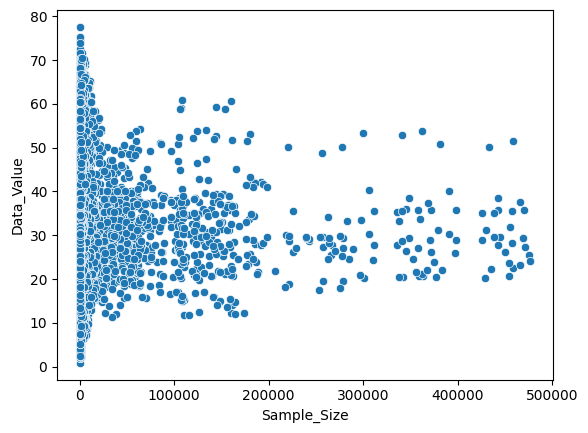

In [10]:
sns.scatterplot(data=df, y="Data_Value", x="Sample_Size")

<Axes: xlabel='Sample_Size', ylabel='Low_Confidence_Limit'>

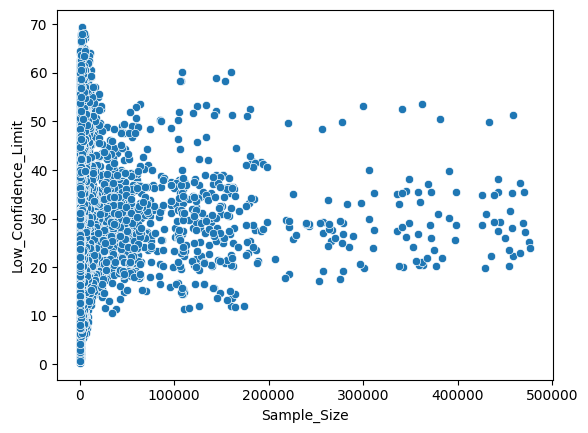

In [21]:
sns.scatterplot(data=df, y="Low_Confidence_Limit", x="Sample_Size")

Columns which are useful and its value

*   YearStart, LocationAbbr, ClassID ,TopicID, QuestionID   
*   List item

